In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")

In [3]:
df.head() # to see the type of information in the dataset

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [4]:
df.info() # we can see the amount of non null values in the dataset and the there datatype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [5]:
df.describe() # the minimum and quartile percentages of various frames 

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [6]:
df.loc[:,'Sex']= list(map(lambda x : 1 if x == "male" else 0,df['Sex'])) # convert sex to integer from object datatype to get their correlation with other features

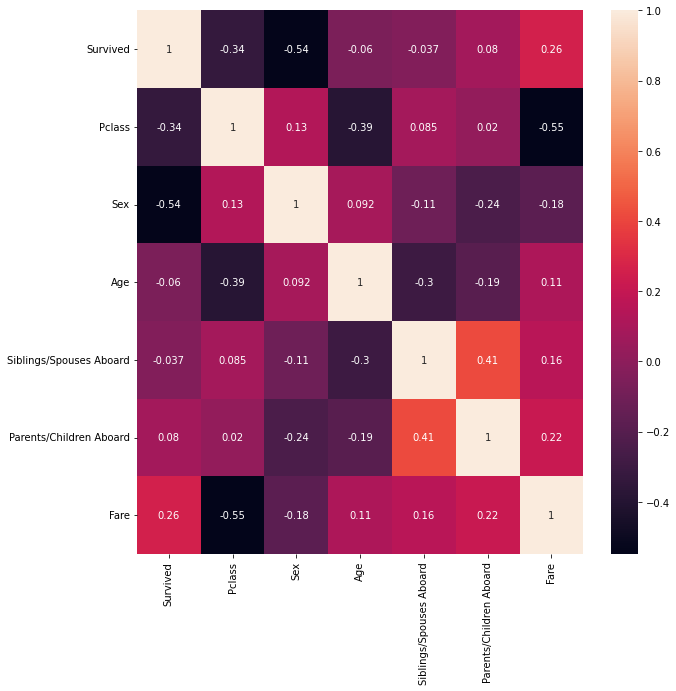

In [9]:
correlation_matrix = df.corr()


fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

### There is a strong negative correlation between passenger class and fare . 
### It is probable that lower the Pclass number , higher the fare.
### Sex , passenger class and fare have high correlation to survival

In [10]:
df['Pclass'].value_counts() # we can see unique values of Pclass

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
df['Fare'].value_counts()  # we can see unique values of Fare

8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [12]:
df.value_counts() # We can see the unique no of rows in the dataset , to detect duplicates

Survived  Pclass  Name                                      Sex  Age   Siblings/Spouses Aboard  Parents/Children Aboard  Fare    
0         1       Capt. Edward Gifford Crosby               1    70.0  1                        1                        71.0000     1
1         1       Miss. Sara Rebecca Compton                0    39.0  1                        1                        83.1583     1
                  Miss. Madeleine Newell                    0    31.0  1                        0                        113.2750    1
                  Miss. Margaret Bechstein Hays             0    24.0  0                        0                        83.1583     1
                  Miss. Margaret Edith Graham               0    19.0  0                        0                        30.0000     1
                                                                                                                                    ..
0         3       Mr. Erik Johansson                        

### There are no duplicate rows in this dataset.

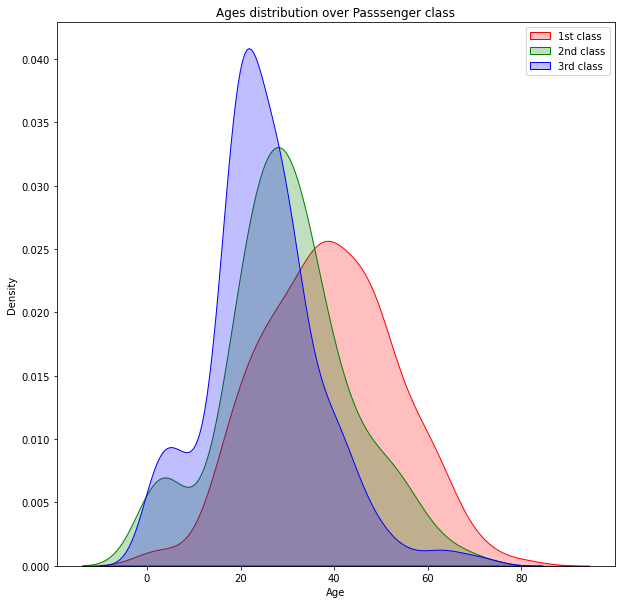

In [13]:

# Age_1class = []
# for i in range(len(df['Age'])):
Age_1class = df.loc[df['Pclass'] == 1]['Age'] # get list of ages of people in 1st class
Age_2class = df.loc[df['Pclass'] == 2]['Age'] # get list of ages of people in 2nd class
Age_3class = df.loc[df['Pclass'] == 3]['Age'] # get list of ages of people in 3rd class


# plot the general distribution of ages of people in different class
fig = plt.figure(figsize=(10,10))
plt.title("Ages distribution over Passsenger class")
sns.kdeplot(data=Age_1class,shade =True, color = "r" ,label='1st class')
sns.kdeplot(data=Age_2class,shade =True, color = "g", label='2nd class')
sns.kdeplot(data=Age_3class,shade =True, color = "b", label='3rd class')

plt.legend()
plt.show()


In [167]:
df['Pclass'].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:ylabel='Sex'>

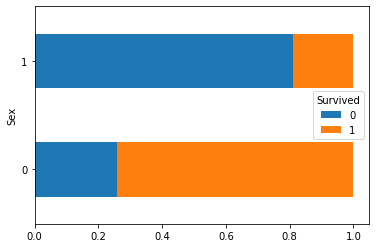

In [23]:
sex_survive = df.groupby(['Sex','Survived']).size().unstack() # take sex vs survived dataframe
norm_sex_survive =sex_survive.apply(lambda x:x/x.sum(), axis=1)# apply normalization of dataframe rowwise
norm_sex_survive.plot(kind='barh', stacked=True, legend=True) # plot stacked bar histogram

<AxesSubplot:ylabel='Pclass'>

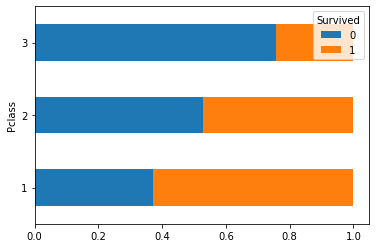

In [24]:
class_survive = df.groupby(['Pclass','Survived']).size().unstack() # take Pclass vs Survived dataframe
norm_class_survive = class_survive.apply(lambda x:x/x.sum(), axis=1) # apply normalization rowwise
norm_class_survive.plot(kind='barh', stacked=True, legend=True) # plot stacked bar histogram

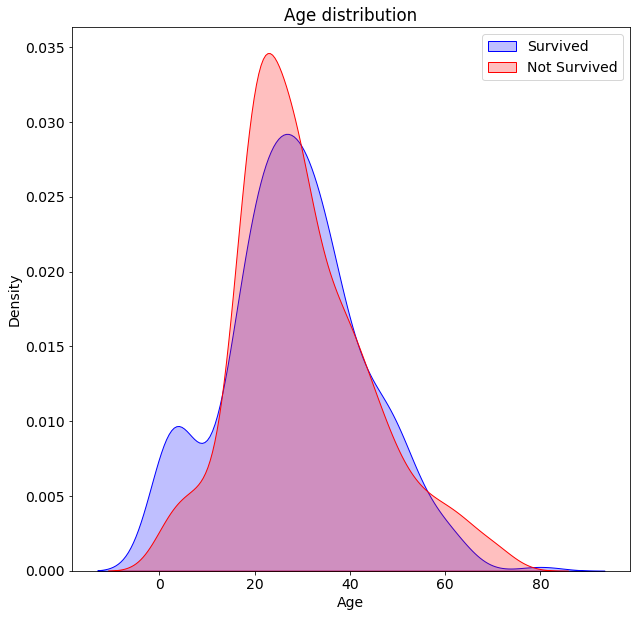

In [199]:
Age_survive = df.loc[df['Survived'] == 1]['Age'] # take list of ages of who survived
Age_not_survive = df.loc[df['Survived'] == 0]['Age']# take list of ages of who did no survive

#plot general distribution of the ages of survived and not survived
fig = plt.figure(figsize=(10, 10))
sns.kdeplot(data=Age_survive,shade =True, color = "b", label = "Survived" )
sns.kdeplot(data=Age_not_survive,shade =True, color = "r", label = "Not Survived")
#ns.distplot(Age_survive, hist=False, rug=False,color="b")
#sns.distplot(Age_not_survive, hist=False, rug=False, color="r")
plt.title("Age distribution")
plt.legend()
plt.show()

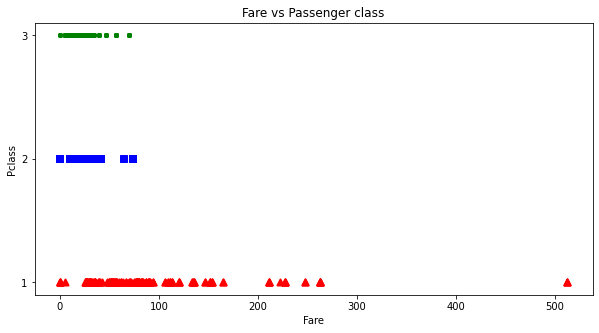

In [5]:
c1_fare = list(df.loc[df['Pclass']== 1]['Fare']) # take list of fares of 1st class
y1 = [1 for i in range(len(c1_fare))] # give y cordinate 1  to the fares of 1st class

c2_fare = list(df.loc[df['Pclass']== 2]['Fare']) # take list of fares of 2nd class
y2 = [2 for i in range(len(c2_fare))] # give y coordinate 2  to the fares of 2nd class

c3_fare = list(df.loc[df['Pclass']== 3]['Fare']) # take list of fares of 3rd class
y3 = [3 for i in range(len(c3_fare))] # give y coordinate 3 to the fares of 3rd class

fig = plt.figure(figsize=(10, 5))
plt.scatter(c1_fare,y1, c ="red",
            linewidths = 2,
            marker ="^",
            edgecolor ="red")

plt.scatter(c2_fare, y2, c ="blue",
            linewidths = 2,
            marker ="s",
            edgecolor ="blue",
            )
plt.scatter(c3_fare, y3, c ="green",
            linewidths = 2,
            marker =".",
            edgecolor ="green",
            )
plt.title("Fare vs Passenger class")
plt.xlabel("Fare")
plt.ylabel("Pclass")
plt.yticks([1,2,3])
plt.show()

In [12]:
df_diam = pd.read_csv("diamonds.csv") 

In [13]:
df_diam.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [14]:
df_diam.info() # list amount of non null values and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [15]:
df_diam.describe() # list mean and percentage quartiles of different data

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
df_diam.value_counts()

Unnamed: 0  carat  cut        color  clarity  depth  table  price  x     y     z   
1           0.23   Ideal      E      SI2      61.5   55.0   326    3.95  3.98  2.43    1
35978       0.35   Very Good  G      VVS1     59.3   61.0   921    4.58  4.62  2.73    1
35954       0.30   Ideal      F      SI1      61.4   58.0   475    4.30  4.33  2.65    1
35955       0.30   Ideal      F      SI1      62.5   56.0   475    4.28  4.30  2.68    1
35956       0.30   Ideal      F      SI1      62.5   57.0   475    4.30  4.31  2.69    1
                                                                                      ..
17984       1.06   Premium    E      VS2      61.3   58.0   7275   6.52  6.56  4.01    1
17985       1.07   Ideal      G      VS2      61.9   55.0   7275   6.55  6.57  4.06    1
17986       1.07   Ideal      G      VS2      61.4   57.0   7275   6.56  6.63  4.05    1
17987       1.06   Ideal      E      VS2      61.9   55.0   7275   6.54  6.58  4.06    1
53940       0.75   Ideal  

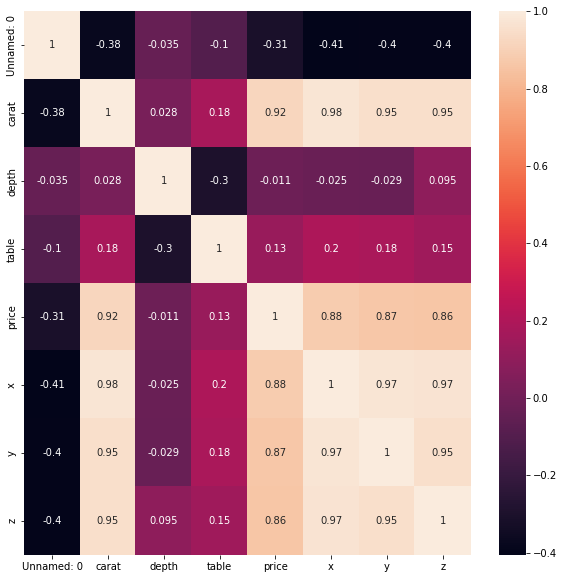

In [17]:
corr_matrix = df_diam.corr()

#print('Correlation Matrix:\n', corr_matrix)

fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(data=corr_matrix, annot=True)
plt.show()

##Preprocessing

In [18]:
df_diam.drop(["Unnamed: 0"],axis =1 , inplace=True)

In [19]:
df_diam.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [20]:
df_diam.count()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64

In [21]:
df_diam.drop_duplicates(inplace= True)

In [22]:
df_diam.count()

carat      53794
cut        53794
color      53794
clarity    53794
depth      53794
table      53794
price      53794
x          53794
y          53794
z          53794
dtype: int64

In [23]:
df_diam.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
53935    0
53936    0
53937    0
53938    0
53939    0
Length: 53794, dtype: int64

In [24]:
df_diam["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [28]:
#df_diam["cut"].replace(df_diam["cut"].unique(),[5,4,2,3,1],inplace=True)
df_diam["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [29]:
df_diam["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [25]:
df_diam.head(8)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53


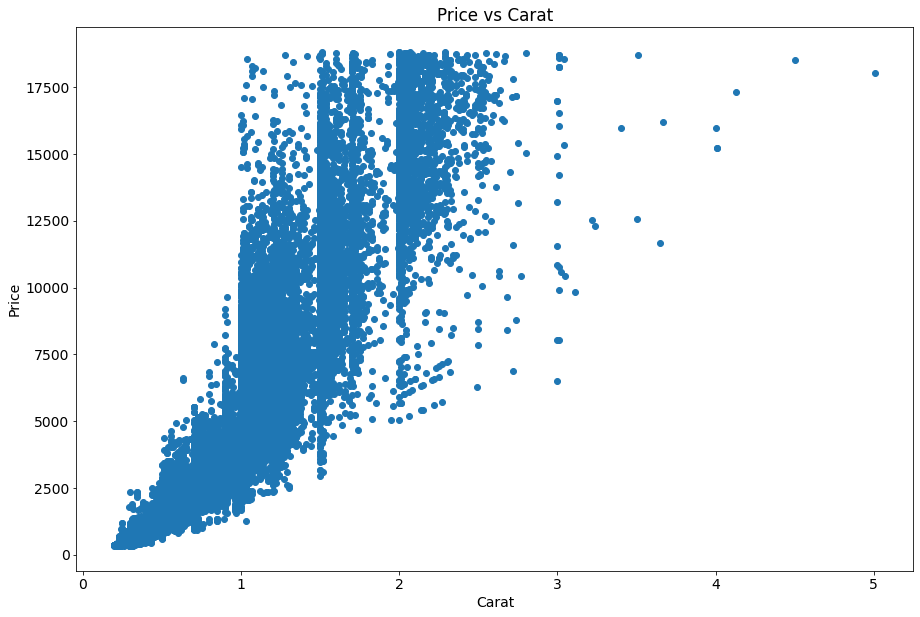

In [31]:
from ssl import PROTOCOL_TLS_CLIENT
plt.rcParams.update({'font.size':14})
carat_list = df_diam["carat"]
price_list = df_diam["price"]
fig = plt.figure(figsize=(15, 10))
plt.scatter(carat_list,price_list)
plt.title("Price vs Carat")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

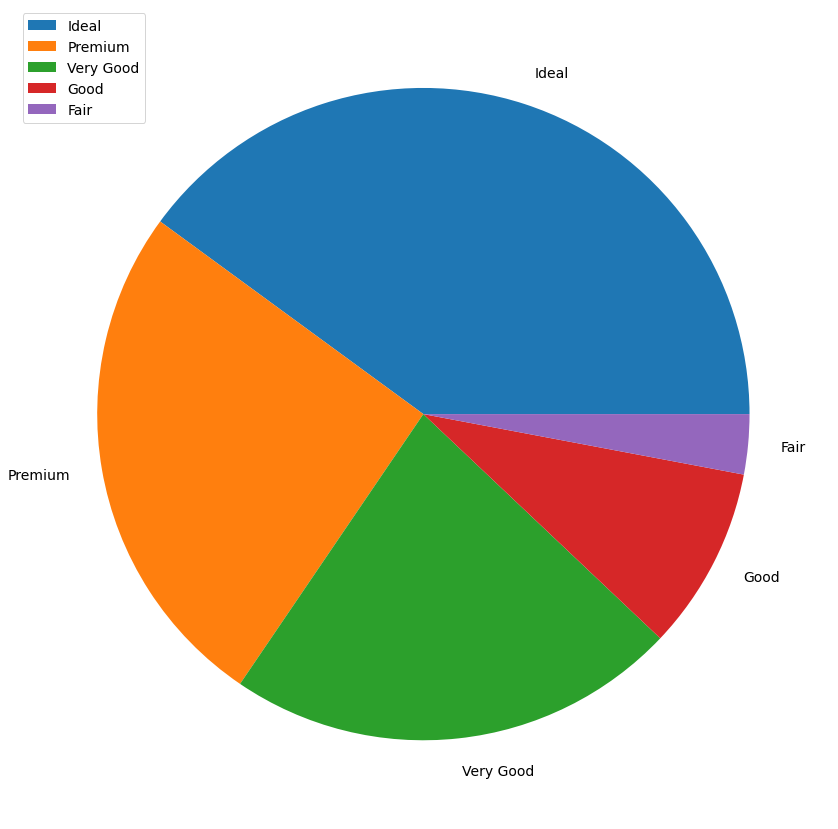

In [27]:
x,y = zip(*((df_diam["cut"].value_counts()).items()))
fig = plt.figure(figsize=(15,15))
plt.pie(y,labels = x )
plt.legend()
plt.show()

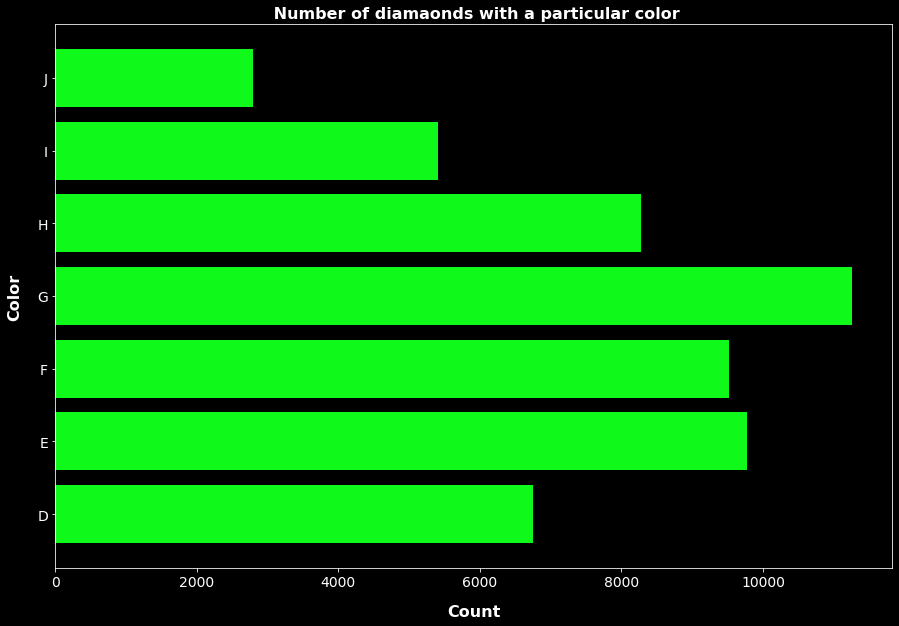

In [32]:
iter = sorted((df_diam["color"].value_counts()).items(),key = lambda item: item[0])
x,y = zip(*(iter))
fig = plt.figure(figsize = (15,10))
fig.patch.set_facecolor('black')
with plt.style.context('dark_background'):
  plt.barh(x,y, color = "#0ff91a")
plt.title(" Number of diamaonds with a particular color",fontsize = 16, weight = "bold")
plt.xlabel("Count",fontsize = 16,labelpad = 15, weight = "bold")
plt.ylabel("Color",fontsize = 16,labelpad = 15, weight = "bold")
plt.show()

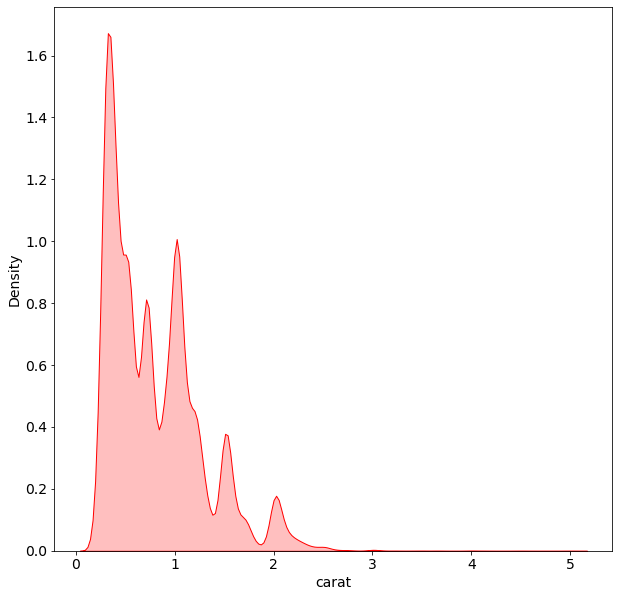

In [193]:
carats= df_diam["carat"]

fig = plt.figure(figsize=(10,10))
sns.kdeplot(data=carats,shade =True, color = "r")

plt.show()

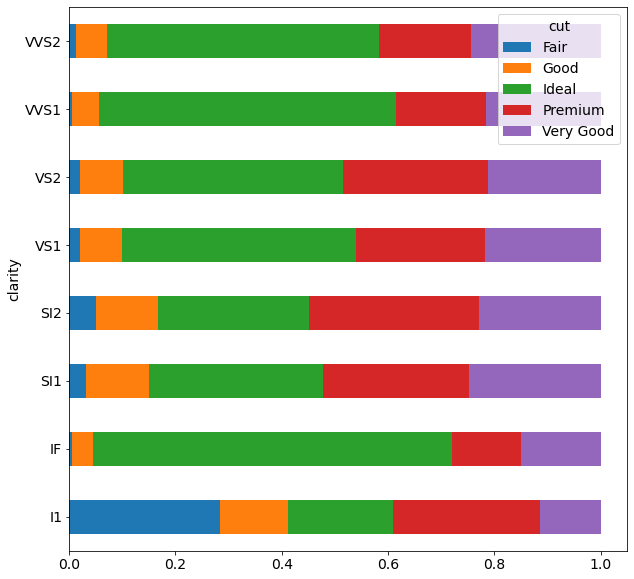

In [194]:
color_cut = df_diam.groupby(['clarity','cut']).size().unstack()

color_cut.apply(lambda x:x/x.sum(), axis=1).plot(kind='barh', stacked=True, legend=True,figsize = (10,10))

